In [34]:
import matplotlib.pyplot as plt
from astropy.constants import R_earth

plt.rcParams['figure.figsize'] = [10, 6]

from pyaw.dmsp import SPDF
from pyaw.configs import DATA_DIR

In [2]:
fp_s3 = DATA_DIR / "dmsp/dmsp-f18_ssies-3_thermal-plasma_201401010124_v01.cdf"
ssies3_instance = SPDF.SSIES3(file_path=str(fp_s3))

fp_ssm = DATA_DIR / "dmsp/dmsp-f18_ssm_magnetometer_20140101_v1.0.4.cdf"
ssm_instance = SPDF.SSM(file_path=str(fp_ssm))

ssies3_couple_ssm_instance = SPDF.SSIES3CoupleSSM(file_path_ssies3=str(fp_s3), file_path_ssm=str(fp_ssm))

In [4]:
df = ssies3_couple_ssm_instance.ssies3_ssm_df
datetimes_ = df.index.values

# Geographic information

Text(0.5, 0, 'datetime (UTC)')

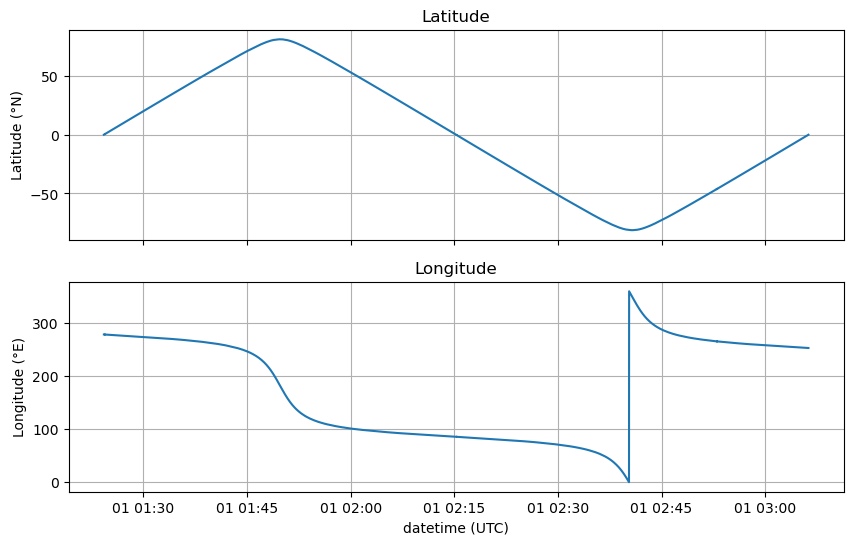

In [35]:
fig, ax = plt.subplots(2, 1, sharex=True)

# ax0
ax[0].plot(datetimes_, df['glat'])
ax[0].grid(True)
ax[0].set_ylabel("Latitude (°N)")
ax[0].set_title("Latitude")

# ax1
ax[1].plot(datetimes_, df['glon'])
ax[1].grid(True)
ax[1].set_ylabel("Longitude (°E)")
ax[1].set_title("Longitude")

plt.xlabel("datetime (UTC)")

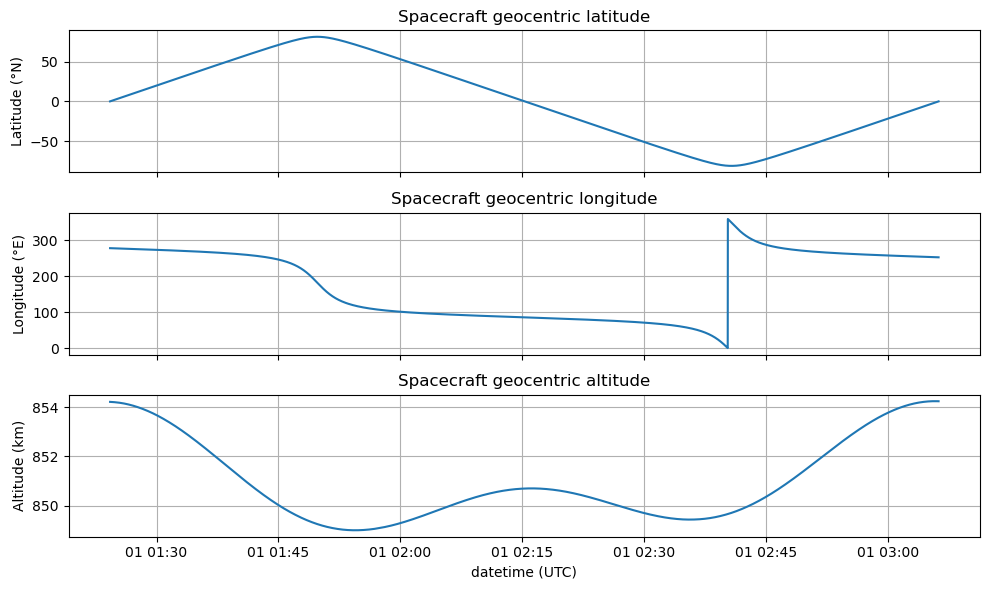

In [36]:
fig, ax = plt.subplots(3, 1, sharex=True)

# ax0
ax[0].plot(datetimes_, df['sc_geocentric_lat'])
ax[0].grid(True)
ax[0].set_ylabel("Latitude (°N)")
ax[0].set_title("Spacecraft geocentric latitude")

# ax1
ax[1].plot(datetimes_, df['sc_geocentric_lon'])
ax[1].grid(True)
ax[1].set_ylabel("Longitude (°E)")
ax[1].set_title("Spacecraft geocentric longitude")

# ax2
ax[2].plot(datetimes_, df['sc_geocentric_r'] - R_earth.to("km").value)
ax[2].grid(True)
ax[2].set_ylabel("Altitude (km)")
ax[2].set_title("Spacecraft geocentric altitude")

plt.xlabel("datetime (UTC)")
plt.tight_layout()

# Geomagnetic information

AACGM latitude, longitude and local time.

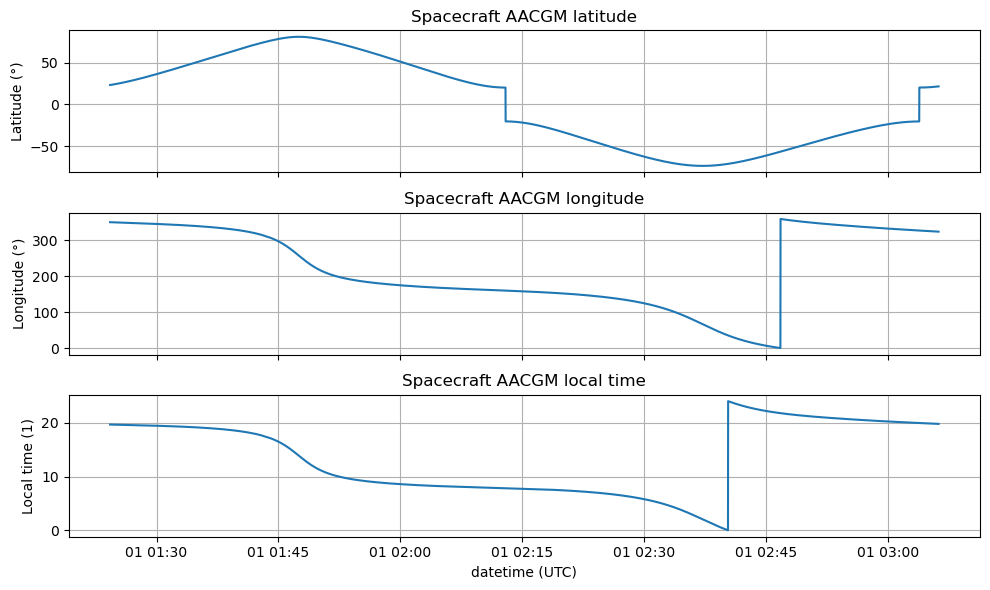

In [37]:
fig, ax = plt.subplots(3, 1, sharex=True)

# ax0
ax[0].plot(datetimes_, df['sc_aacgm_lat'])
ax[0].grid(True)
ax[0].set_ylabel("Latitude (°)")
ax[0].set_title("Spacecraft AACGM latitude")

# ax1
ax[1].plot(datetimes_, df['sc_aacgm_lon'])
ax[1].grid(True)
ax[1].set_ylabel("Longitude (°)")
ax[1].set_title("Spacecraft AACGM longitude")

# ax2
ax[2].plot(datetimes_, df['sc_aacgm_ltime'])
ax[2].grid(True)
ax[2].set_ylabel("Local time (1)")
ax[2].set_title("Spacecraft AACGM local time")

plt.xlabel("datetime (UTC)")
plt.tight_layout()

# Parameters of plasma

- Fractional amount of H+, He+ and O+.
- Temperature of ion and electron
- number density of ion

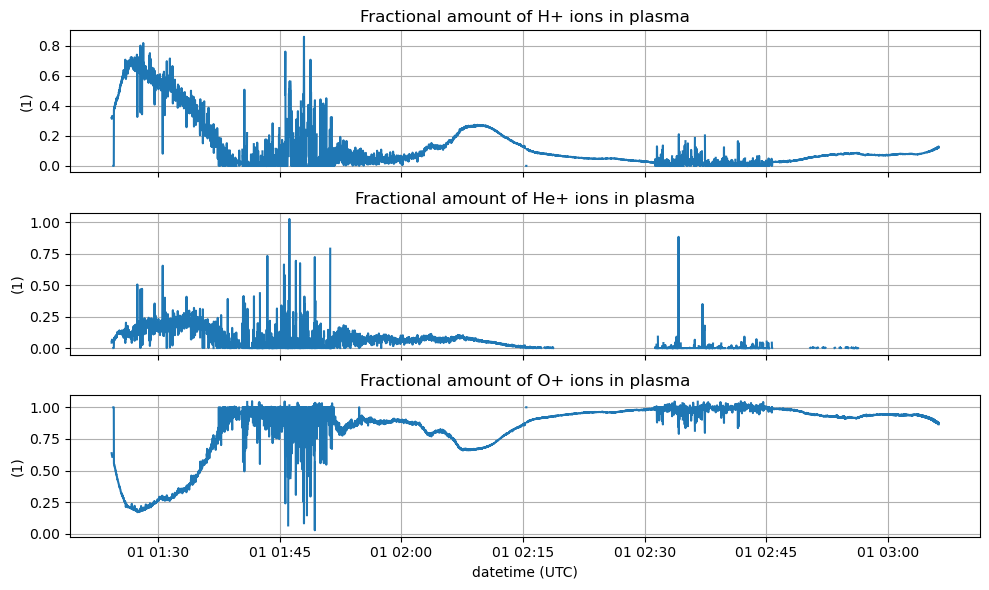

In [43]:
fig, ax = plt.subplots(3, 1, sharex=True)

# ax0
ax[0].plot(datetimes_, df['frach'])
ax[0].grid(True)
ax[0].set_ylabel("(1)")
ax[0].set_title("Fractional amount of H+ ions in plasma")

# ax1
ax[1].plot(datetimes_, df['frache'])
ax[1].grid(True)
ax[1].set_ylabel("(1)")
ax[1].set_title("Fractional amount of He+ ions in plasma")

# ax2
ax[2].plot(datetimes_, df['fraco'])
ax[2].grid(True)
ax[2].set_ylabel("(1)")
ax[2].set_title("Fractional amount of O+ ions in plasma")

plt.xlabel("datetime (UTC)")
plt.tight_layout()

Text(0.5, 1.0, 'Temperature of plasma')

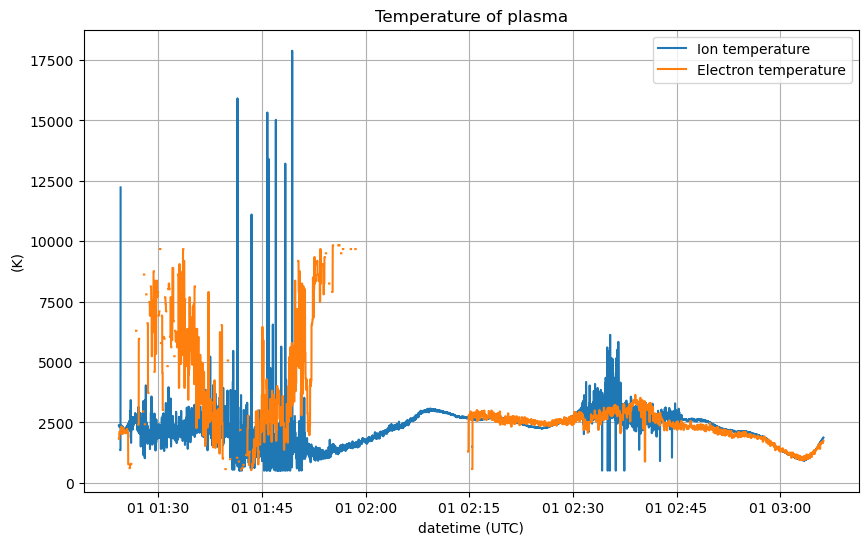

In [47]:
plt.figure()
plt.plot(datetimes_, df['temp'], label="Ion temperature")
plt.plot(datetimes_, df['te'], label="Electron temperature")
plt.grid()
plt.legend()
plt.xlabel("datetime (UTC)")
plt.ylabel("(K)")
plt.title("Temperature of plasma")

Text(0.5, 1.0, 'Number density of ion')

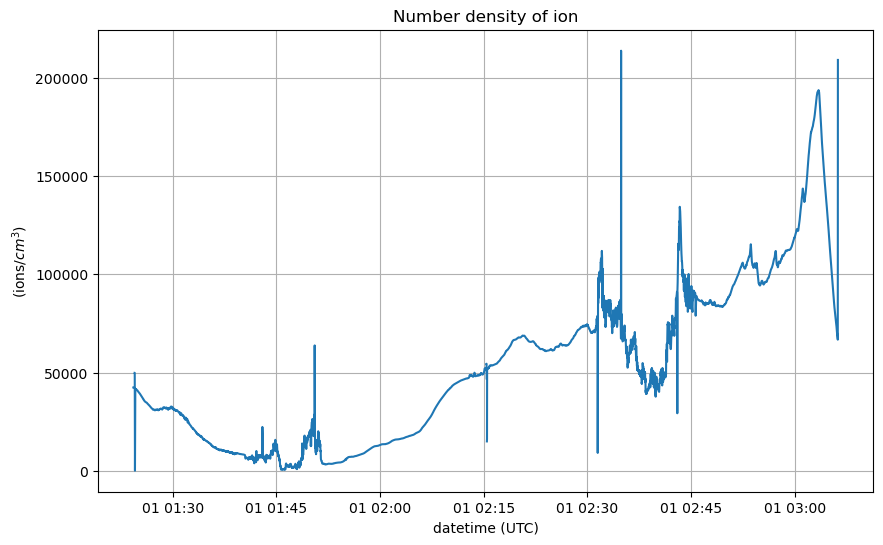

In [50]:
plt.figure()
plt.plot(datetimes_, df['ductdens'])
plt.grid()
plt.xlabel("datetime (UTC)")
plt.ylabel("(ions/$cm^{3}$)")
plt.title("Number density of ion")

# Velocity of plasma

Text(0.5, 1.0, 'Velocity of plasma in ENU coordinate system')

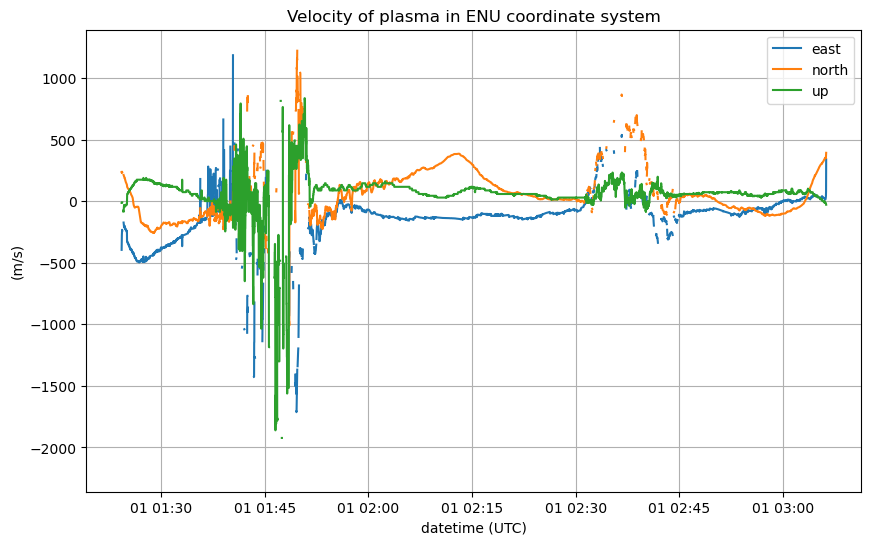

In [45]:
plt.figure()
plt.plot(datetimes_, df['v_enu1'], label="east")
plt.plot(datetimes_, df['v_enu2'], label="north")
plt.plot(datetimes_, df['v_enu3'], label="up")
plt.grid()
plt.legend()
plt.xlabel("datetime (UTC)")
plt.ylabel("(m/s)")
plt.title("Velocity of plasma in ENU coordinate system")

Text(0.5, 1.0, 'Velocity of plasma in DMSP SSIES3 S/C coordinate system')

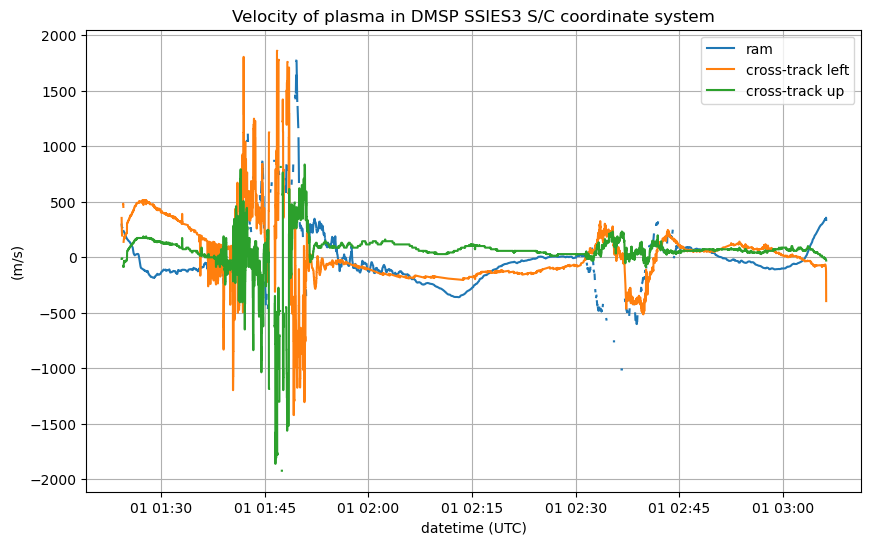

In [46]:
plt.figure()
plt.plot(datetimes_, df['v_s3_sc1'], label="ram")
plt.plot(datetimes_, df['v_s3_sc2'], label="cross-track left")
plt.plot(datetimes_, df['v_s3_sc3'], label="cross-track up")
plt.grid()
plt.legend()
plt.xlabel("datetime (UTC)")
plt.ylabel("(m/s)")
plt.title("Velocity of plasma in DMSP SSIES3 S/C coordinate system")

# Electric field

Text(0.5, 1.0, 'Electric field in ENU coordinate system')

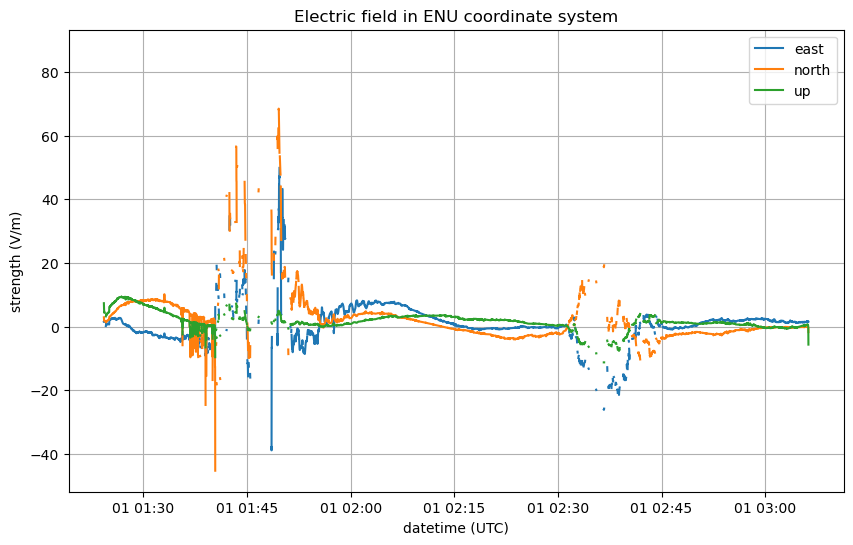

In [38]:
plt.figure()
plt.plot(datetimes_, df['E_enu1'], label="east")
plt.plot(datetimes_, df['E_enu2'], label="north")
plt.plot(datetimes_, df['E_enu3'], label="up")
plt.grid()
plt.legend()
plt.xlabel("datetime (UTC)")
plt.ylabel("strength (V/m)")
plt.title("Electric field in ENU coordinate system")

Text(0.5, 1.0, 'Electric field in DMSP SSIES3 S/C coordinate system')

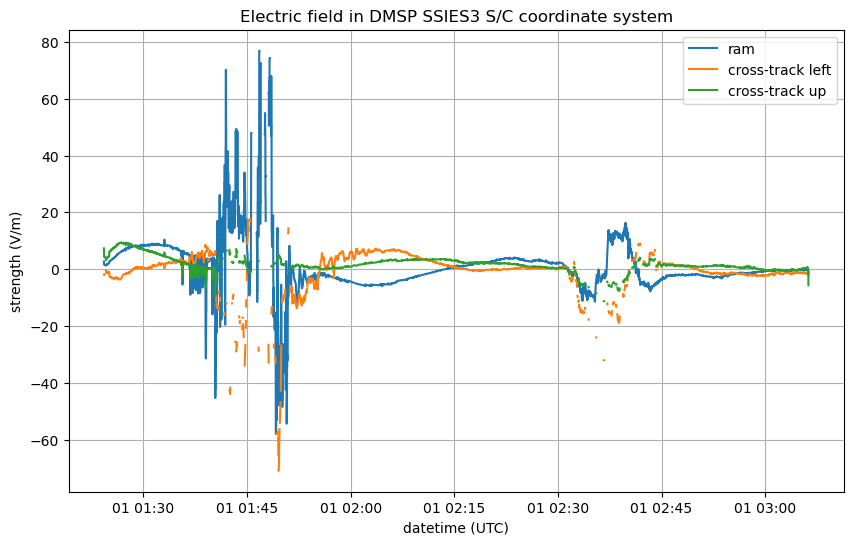

In [39]:
plt.figure()
plt.plot(datetimes_, df['E_s3_sc1'], label="ram")
plt.plot(datetimes_, df['E_s3_sc2'], label="cross-track left")
plt.plot(datetimes_, df['E_s3_sc3'], label="cross-track up")
plt.grid()
plt.legend()
plt.xlabel("datetime (UTC)")
plt.ylabel("strength (V/m)")
plt.title("Electric field in DMSP SSIES3 S/C coordinate system")

# Magnetic field

Text(0.5, 1.0, 'Magnetic field in ENU coordinate system')

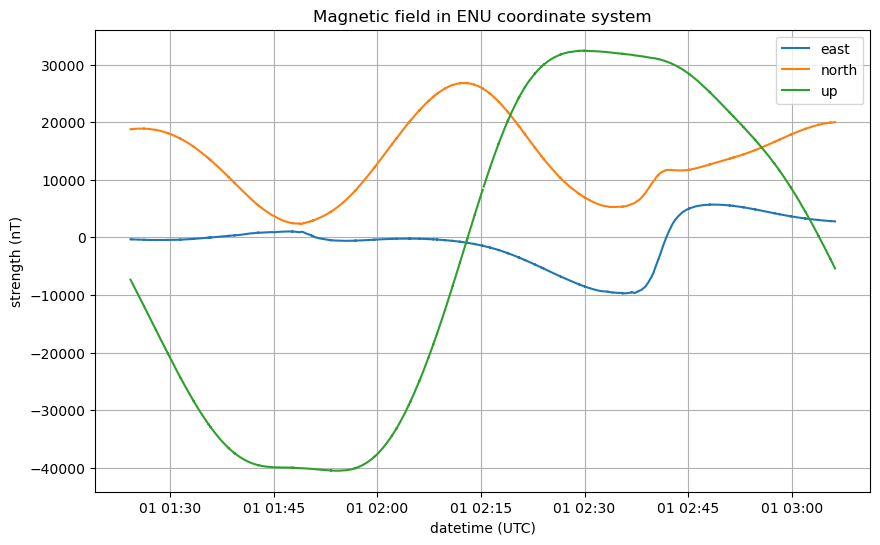

In [40]:
plt.figure()
plt.plot(datetimes_, df['b_enu1'], label="east")
plt.plot(datetimes_, df['b_enu2'], label="north")
plt.plot(datetimes_, df['b_enu3'], label="up")
plt.grid()
plt.legend()
plt.xlabel("datetime (UTC)")
plt.ylabel("strength (nT)")
plt.title("Magnetic field in ENU coordinate system")

Text(0.5, 1.0, 'Magnetic perturbation field in ENU coordinate system')

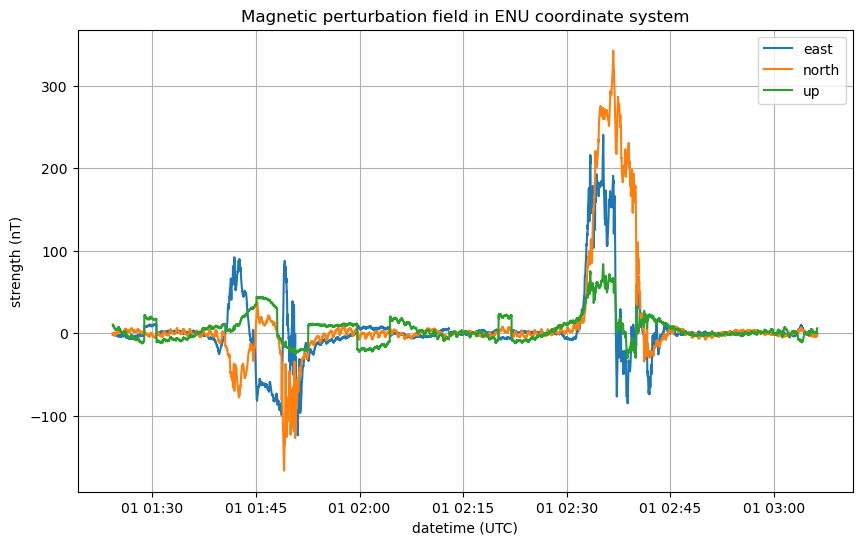

In [41]:
plt.figure()
plt.plot(datetimes_, df['b1_enu1'], label="east")
plt.plot(datetimes_, df['b1_enu2'], label="north")
plt.plot(datetimes_, df['b1_enu3'], label="up")
plt.grid()
plt.legend()
plt.xlabel("datetime (UTC)")
plt.ylabel("strength (nT)")
plt.title("Magnetic perturbation field in ENU coordinate system")